In [35]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.model_selection import cross_val_score
from sklearn import mixture
from numpy import linalg
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

#import dataset
dataset = pd.read_csv('pid-5M.csv')

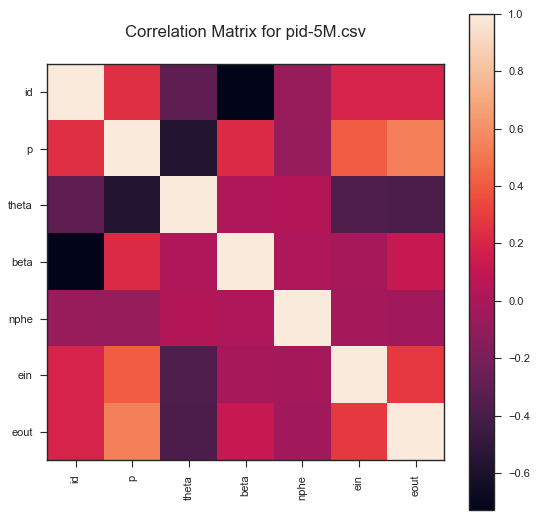

In [32]:
#Data vis 1: plot correlation grid (on the raw data)

data = pd.read_csv('pid-5M.csv')
data.dataframeName = 'pid-5M.csv'

def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

plotCorrelationMatrix(data,8)

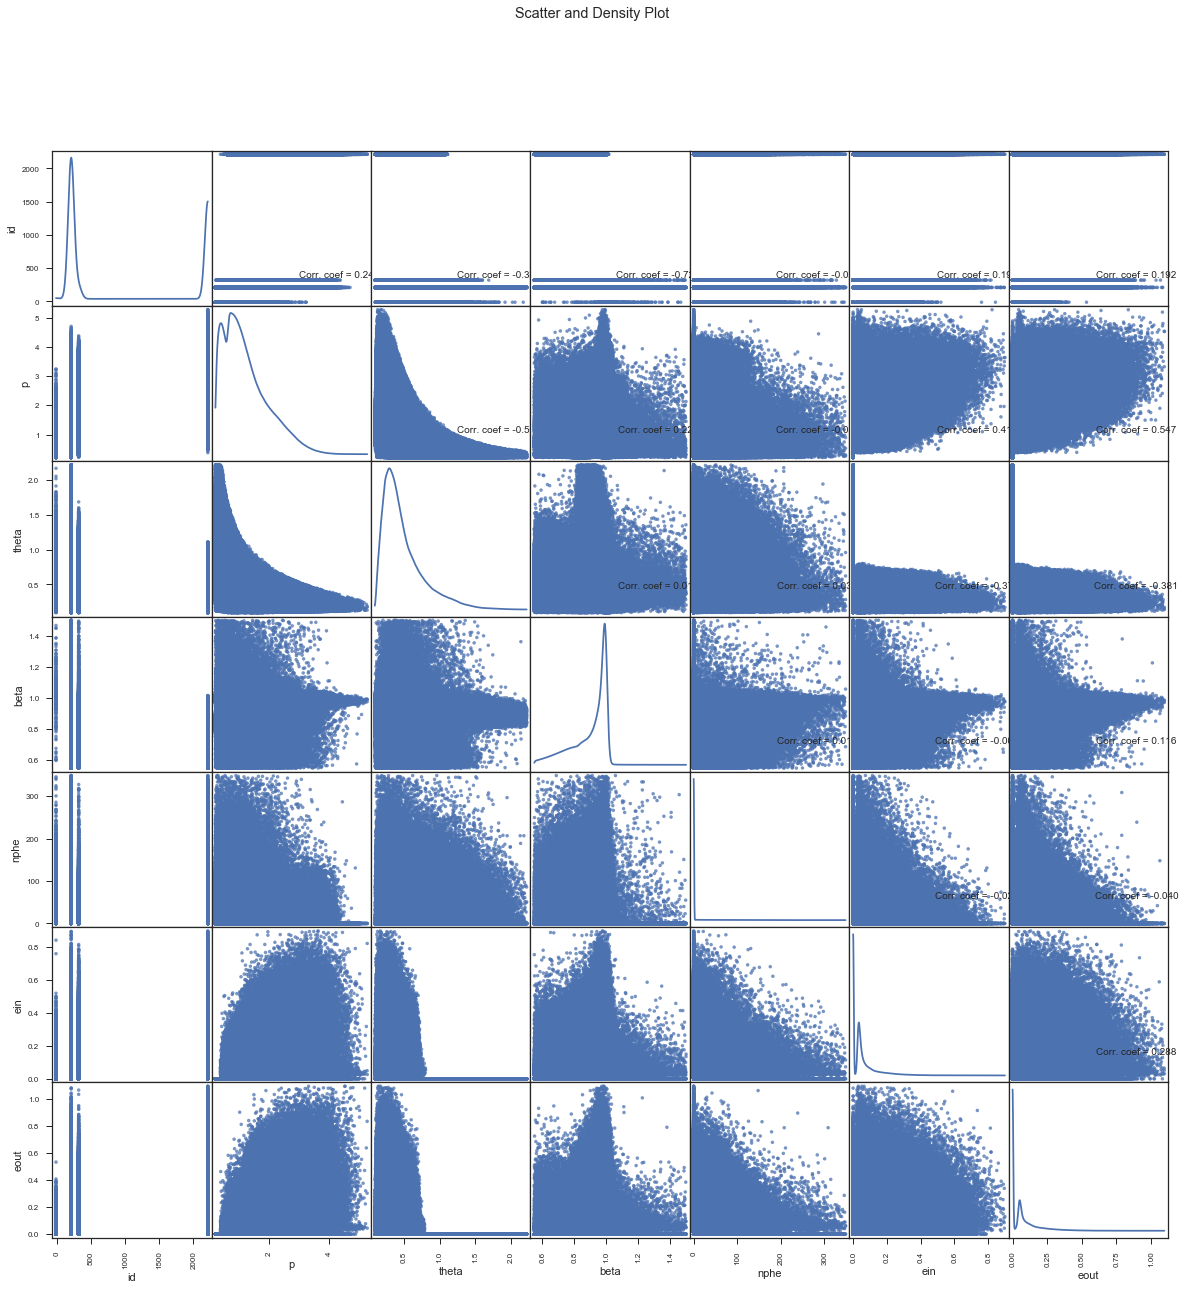

In [ ]:
#Data vis 2: scatter plots for each feature against other features

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    
plotScatterMatrix(data,20,10)

In [36]:
#split up data 

X = np.array(data.drop("id", axis = 1))
y = np.array(data["id"])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_true = train_test_split(X, y, test_size = 0.2)

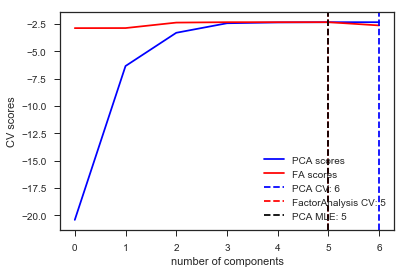

A
[  -11.   211.   321.  2212.]
[ -11  211  321 2212]
B
[  -11.   211.   321.  2212.]
[  -11.   211.   321.  2212.]
C
[  -11.   211.   321.  2212.]
[ -11  211  321 2212]
D
[  -11.   211.   321.  2212.]
[  -11.   211.   321.  2212.]
E
[  -11.   211.   321.  2212.]
[  -11.   211.   321.  2212.]


In [53]:
#different modified data sets with training and testing data for each modification  --------------------------------

# A) unmodified data set
dfA = np.asarray(data)
X_train_A = X_train
X_test_A = X_test
y_train_A = y_train
y_true_A = y_true

# B) data set with all observations with zero values for inner or outer energy removed  -----------------------------
b = True
if (b == True):
    global Xb
    Xb = X
    temp = Xb[:,4] != 0
    Xb = Xb[temp]
    temp = Xb[:,5] != 0
    Xb = Xb[temp]
    global yb
    yb = y
    yb = yb[temp]
    
    X_train_B, X_test_B, y_train_B, y_true_B = train_test_split(Xb, yb, test_size = 0.2)
    

# C) data set with all outer and inner energy features removed      -------------------------------------------
c = True
if (c == True):
    global X_train_C
    X_train_C = X_train_A[:,0:4]
    global X_test_C
    X_test_C = X_test_A[:,0:4]
    global y_train_C
    y_train_C = y_train_A
    global y_true_C
    y_true_C = y_true_A
    

# D) data set with zero values for outer and inner energy replaced with label averages for inner and outer energy
d = True
if (d == True):
    global dfD
    dfD = dfA
    labels = [211., 321., -11., 2212.]
    for label in labels:
        is_label = dfD == label
        label_features = dfD[is_label[:,0],5:7]
        label_averages = np.sum(label_features, axis=0)/label_features.shape[0]
        dfD[np.where(dfD[:,5]==0),5]=label_averages[0]
        dfD[np.where(dfD[:,6]==0),6]=label_averages[1]
    Xd = dfD[:,1:-1]   
    X_train_D, X_test_D, y_train_D, y_true_D = train_test_split(Xd, y, test_size = 0.2)
        
# E) PCA     -------------------------------------------------------------------------------------------

X = dfA[:,1:7]
y = dfA[:,0]
feature_number = range(7)
# This is how you would normally deterimine the cross-validation scores for factor loading matrix (PCA & FA) of rank < 7, but it takes > 14 hours, so the scores are recorded manually.
#
# feature_number = range(7)
# def compute_scores(X):
#    pca = PCA(svd_solver='full')
#    fa = FactorAnalysis()
#    pca_scores = []
#    fa_scores = []
#    for n in feature_number:
#        pca.n_components = n
#        fa.n_components = n
#        pca_scores.append(np.mean(cross_val_score(pca, X)))
#        fa_scores.append(np.mean(cross_val_score(fa, X)))
#    return pca_scores , fa_scores
# pca_scores, fa_scores = compute_scores(X)

pca_scores = [-20.417304627720515, -6.337975461158428, -3.2960940429579977, -2.422670031401208, -2.3466500178010197, -2.326699703481935, -2.326699703481893]
fa_scores = [-2.8688666472682827, -2.863668467090598, -2.3627710341253514, -2.326786520577398, -2.3266997211578873, -2.326699706167654, -2.62355281624038]
n_components_pca = feature_number[np.argmax(pca_scores)]
n_components_fa = feature_number[np.argmax(fa_scores)]

plt.figure()
plt.plot(feature_number, pca_scores, 'b', label='PCA scores')
plt.plot(feature_number, fa_scores, 'r', label='FA scores')
plt.axvline(n_components_pca, color='b',label='PCA CV: %d' % n_components_pca, linestyle='--')
plt.axvline(n_components_fa, color='r', label='FactorAnalysis CV: %d' % n_components_fa, linestyle='--')

pca = PCA(svd_solver='full', n_components='mle')
pca.fit(X)
n_components_pca_mle = pca.n_components_
plt.axvline(n_components_pca_mle, color='k', label='PCA MLE: %d' % n_components_pca_mle, linestyle='--')

plt.xlabel('number of components')
plt.ylabel('CV scores')
plt.legend(loc='lower right')

plt.show()

#fa = FactorAnalysis()
#fa.n_components = 5
#fa_data = fa.fit_transform(X)

pca_data = pca.fit_transform(X)
X_train_E, X_test_E, y_train_E, y_true_E = train_test_split(pca_data, y, test_size = 0.2)

#---------------------------------------------------------------------------------------------------------------------

#check to make sure that there are 4 unique labels in both the test and train data sets for all data sets above
print('A')
y_test_array = np.array(y_train_A)
y_test_number = np.unique(y_test_array)
print(y_test_number)
y_test_array = np.array(y_true_A)
y_test_number = np.unique(y_test_array)
print(y_test_number)

print('B')
y_test_array = np.array(y_train_B)
y_test_number = np.unique(y_test_array)
print(y_test_number)
y_test_array = np.array(y_true_B)
y_test_number = np.unique(y_test_array)
print(y_test_number)

print('C')
y_test_array = np.array(y_train_C)
y_test_number = np.unique(y_test_array)
print(y_test_number)
y_test_array = np.array(y_true_C)
y_test_number = np.unique(y_test_array)
print(y_test_number)

print('D')
y_test_array = np.array(y_train_D)
y_test_number = np.unique(y_test_array)
print(y_test_number)
y_test_array = np.array(y_true_D)
y_test_number = np.unique(y_test_array)
print(y_test_number)

print('E')
y_test_array = np.array(y_train_E)
y_test_number = np.unique(y_test_array)
print(y_test_number)
y_test_array = np.array(y_true_E)
y_test_number = np.unique(y_test_array)
print(y_test_number)


